In [1]:
import pandas as pd
from IPython.display import display
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

import scipy

import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("..\\M&M MSA\\Dataset\\df_wine.csv",index_col=0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_code
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,0


<h3>Step 1. Choose variables for sampling from your dataset (overall – about 10 variables, 3-4 – target variables, the rest - predictors).</h3>

In [3]:
variables = ["fixed acidity","residual sugar","chlorides","total sulfur dioxide","density","sulphates","pH","alcohol","quality","type_code"]

target=["density","alcohol","quality","type_code"]
X=["pH","fixed acidity","residual sugar","chlorides","total sulfur dioxide","sulphates"]
#5000 samples
subsample = df[variables].sample(5000, replace=False, random_state=7266)

print(subsample.shape)
print(subsample.dtypes)
subsample

(5000, 10)
fixed acidity           float64
residual sugar          float64
chlorides               float64
total sulfur dioxide    float64
density                 float64
sulphates               float64
pH                      float64
alcohol                 float64
quality                   int64
type_code                 int64
dtype: object


,fixed acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,pH,alcohol,quality,type_code
6247,6.9,2.8,0.081,41.0,0.99518,0.52,3.41,10.8,5,0
5977,7.9,8.3,0.050,278.0,0.99316,0.51,3.01,12.3,7,0
1194,6.2,8.3,0.025,216.0,0.99640,0.60,3.33,9.6,6,1
6233,6.6,2.4,0.069,40.0,0.99387,0.66,3.38,12.6,6,0
5799,7.4,2.4,0.080,33.0,0.99736,0.69,3.58,10.8,7,0
...,...,...,...,...,...,...,...,...,...,...
5617,7.1,3.9,0.086,45.0,0.99760,0.54,3.46,9.5,5,0
1994,7.0,14.6,0.043,168.0,0.99940,0.67,3.34,8.8,6,1
5333,12.3,2.3,0.091,18.0,1.00040,0.49,3.16,9.5,5,0
1509,7.9,1.6,0.053,144.0,0.99300,0.47,3.16,10.5,5,1


<h3>Step 2. Using univariate parametric distributions that were fitted in Lab#2 make sampling of chosen target variables. Use for these 2 different sampling methods.</h3>

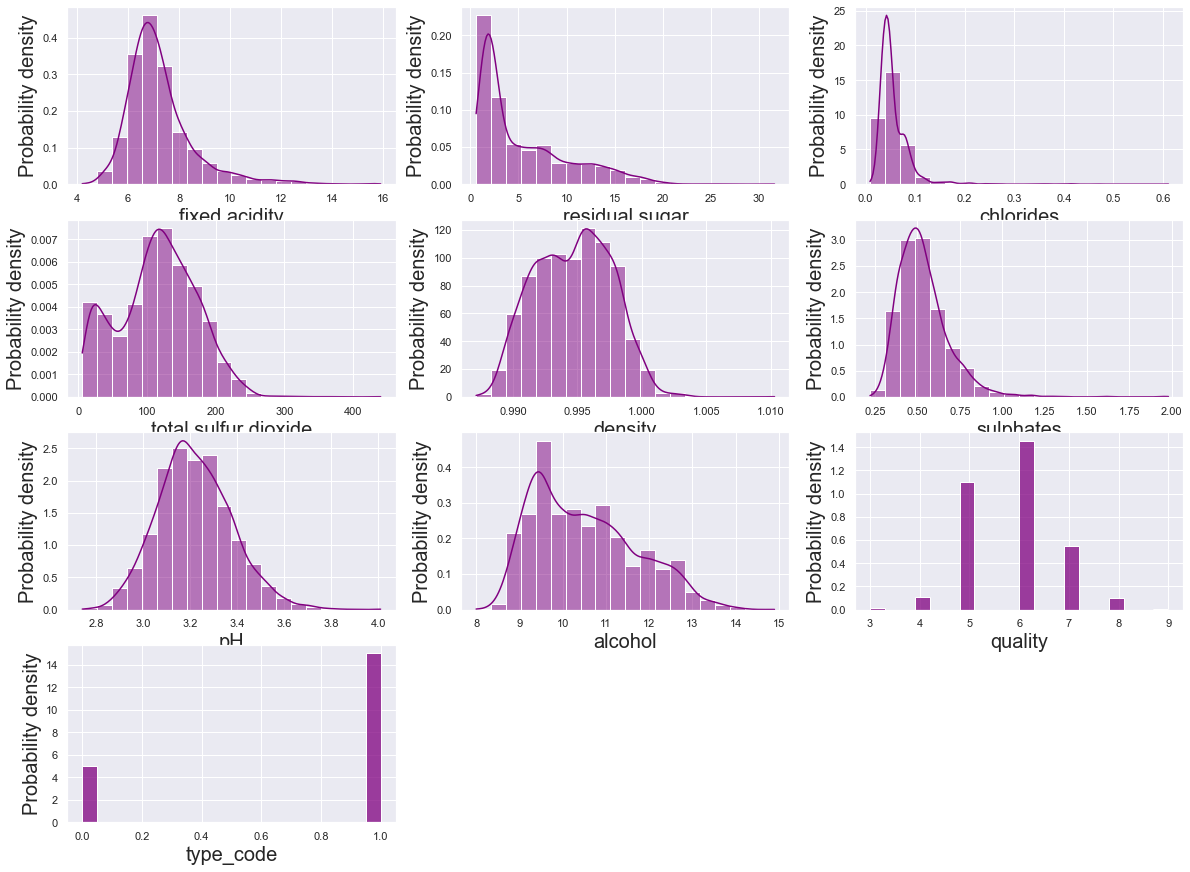

In [8]:
#Just check our disributions and corr heatmap
for i in range(0,10):
    plt.subplot(4, 3, i+1)

    col=variables[i]

    isKde=True
    if(col=="quality" or col=="type_code"):
        isKde=False

    ax=sns.histplot(subsample[col],stat="density",bins=20,common_norm=False,color="purple",kde=isKde)
    ax.set(ylabel="Probability density")

<h3>Step 3. Estimate relations between predictors and chosen target variables. At least, they should have significant correlation coefficients.</h3>

<AxesSubplot:>

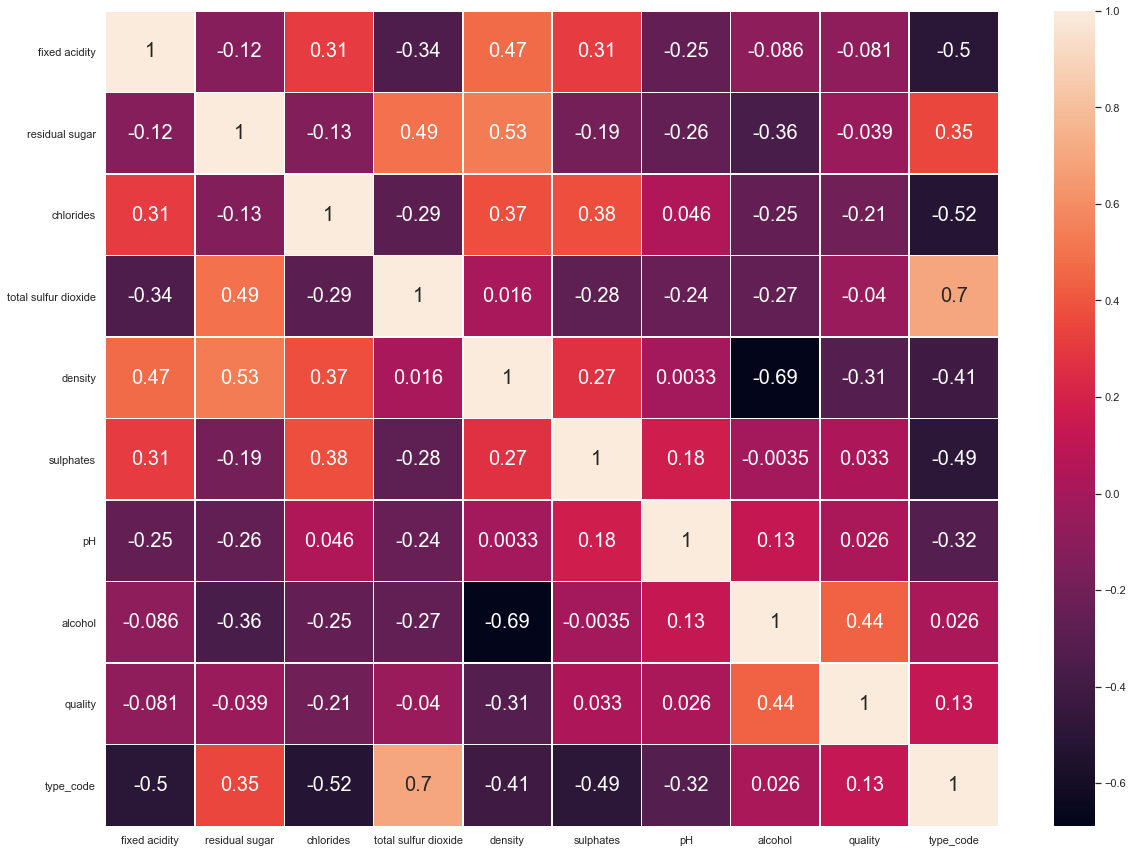

In [9]:
corr=subsample.corr()
sns.heatmap(corr,annot=True, linewidths=.5)

So, I have removed pH feature from target variables here and have added density (And got target and X had written above).

<h3>Step 4. Build a Bayesian network for chosen set of variables. Choose its structure on the basis of multivariate analysis and train distributions in nodes using chosen algorithm.